In [ ]:
# ---------------------
# Step 1: Import Libraries
# ---------------------
# Import necessary libraries: requests, BeautifulSoup, pandas, matplotlib/seaborn.

# ---------------------
# Step 2: Request Data
# ---------------------
# Make an HTTP GET request to the Wikipedia URL containing the age-wise literacy data.

# ---------------------
# Step 3: Parse the HTML
# ---------------------
# Use BeautifulSoup to parse the page.
# Locate the specific table that includes age-wise literacy rates by country.

# ---------------------
# Step 4: Extract Data from Table
# ---------------------
# For each country, extract columns such as:
# - Country Name
# - Year
# - Total Literacy Rate
# - Youth Literacy Rate
# - Adult Literacy Rate
# - Elderly Literacy Rate (if present)
# Ensure column consistency and handle missing values appropriately.

# ---------------------
# Step 5: Save Data to CSV
# ---------------------
# Store the structured data in a CSV file with proper headers.

# ---------------------
# Step 6: Load CSV for Analysis
# ---------------------
# Read the CSV using pandas and verify data integrity (data types, null values).

# ---------------------
# Step 7: Data Cleaning
# ---------------------
# Clean the data:
# - Convert percentages to numeric format.
# - Handle null or inconsistent values.
# - Filter out rows with missing 'Total Literacy Rate' or Year.

# ---------------------
# Step 8: Univariate Analysis
# ---------------------
# Analyze individual literacy metrics:
# - Distribution of total literacy rates
# - Compare youth vs adult vs elderly literacy rates globally
# - Use histograms, boxplots

# ---------------------
# Step 9: Bivariate Analysis
# ---------------------
# Explore relationships such as:
# - Youth vs Adult literacy rate (scatterplot)
# - Literacy rate vs year (line plots or trends if historical)
# - Total vs elderly literacy rate to explore generational shifts

# ---------------------
# Step 10: Grouped Analysis
# ---------------------
# Optional: Map countries to continents/regions manually or via a lookup.
# - Compare regional averages for each age group.
# - Highlight global trends by region.

# ---------------------
# Step 11: Descriptive Statistics
# ---------------------
# Calculate mean, median, std. deviation for each literacy category (youth, adult, elderly).
# Identify countries with literacy gaps between age groups.

# ---------------------
# Step 12: Define & Answer Key Questions
# ---------------------
# Use visualizations and analysis to answer:

# 1. Which countries have the highest and lowest total literacy rates?
# 2. Which countries have the largest gaps between youth and elderly literacy rates?
# 3. What is the global average youth literacy rate?
# 4. Are countries improving literacy over time? (if historical data exists)
# 5. Which countries have high youth literacy but low elderly literacy?
# 6. Are there countries with uniformly high literacy across all age groups?
# 7. What age group has the most variation in literacy across countries?

# ---------------------
# Step 13: Visualizations
# ---------------------
# Create plots:
# - Bar chart: Top 10 countries by youth literacy
# - Boxplot: Literacy rate by age group
# - Scatter plot: Youth vs Elderly literacy
# - Heatmap (optional): Literacy rates across age groups by region

# ---------------------
# Step 14: Summary of Insights
# ---------------------
# Write your interpretations based on the visualizations.
# Discuss countries doing well, those lagging behind, and age groups needing focus.

# ---------------------
# Step 15: Save Results
# ---------------------
# Save your CSV and visualizations for final submission.

In [58]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:


url = "https://en.m.wikipedia.org/wiki/List_of_countries_by_literacy_rate"
response = requests.get(url)
response.raise_for_status()


In [62]:
soup = BeautifulSoup(response.content, "html.parser")
table = soup.find("table", class_="wikitable")
if table:
    print("Table found successfully.")
else:
    print("Table not found. Check the HTML structure and selector.")


Table found successfully.


In [67]:
data = []
rows = table.find_all("tr")
header_row = rows[0]
headers = [header.text.strip() for header in header_row.find_all("th")]

for row in rows[1:]:
    cols = row.find_all("td")
    row_data = {}
    for i, col in enumerate(cols):
        if i < len(headers):
            header = headers[i]
            try:
                row_data[header] = col.text.strip()
            except IndexError:
                row_data[header] = None
        else:
            pass

    data.append(row_data)

In [63]:
df = pd.DataFrame(data)

In [105]:
df.columns = df.columns.astype(str).str.replace(r'\[.*\]', '', regex=True)
df.columns = df.columns.str.strip()
df = df.rename(columns={df.columns[0]: "Country"})
df = df.rename(columns={df.columns[1]: "Year"})
df = df.rename(columns={df.columns[2]: "Youth Literacy Rate"})
df = df.rename(columns={df.columns[3]: "Adult Literacy Rate"})
df = df.rename(columns={df.columns[4]: "Elderly Literacy Rate"})
df = df.rename(columns={df.columns[5]: "Total Literacy Rate"})

In [70]:
numeric_cols = ['Year', 'Youth Literacy Rate', 'Adult Literacy Rate', 'Elderly Literacy Rate', 'Total Literacy Rate']
for col in numeric_cols:
    df[col] = df[col].str.replace(r'[^\d.]', '', regex=True)
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [71]:
df.dropna(subset=['Total Literacy Rate'], inplace=True)
df.dropna(subset=['Year'], inplace=True)


In [72]:
df.to_csv("literacy_rates.csv", index=False)

print(df.head())

            Country  Year  Youth Literacy Rate  Adult Literacy Rate  \
1     Afghanistan *  65.0              20204.0                 31.7   
2         Albania *  99.2               2012.0                 97.2   
3         Algeria *  93.8               2008.0                 75.1   
4  American Samoa *  97.7               1980.0                 97.3   
6          Angola *  77.4               2014.0                 66.0   

   Elderly Literacy Rate  Total Literacy Rate     6    7     8  
1                 2011.0                 20.3  2011  0.5  2011  
2                 2012.0                 86.9  2012  1.0  2012  
3                 2008.0                 19.5  2008  1.0  2008  
4                 1980.0                 92.7  1980  1.0  1980  
6                 2014.0                 27.0  2014  0.8  2014  


In [73]:

selected_columns = ['Country', 'Year', 'Total Literacy Rate', 'Youth Literacy Rate', 'Adult Literacy Rate', 'Elderly Literacy Rate']
df_selected = df[selected_columns].copy()
for col in ['Total Literacy Rate', 'Youth Literacy Rate', 'Adult Literacy Rate', 'Elderly Literacy Rate']:
    df_selected[col] = df_selected[col].replace('', float('nan'))
numeric_columns_to_fill = ['Year', 'Total Literacy Rate', 'Youth Literacy Rate', 'Adult Literacy Rate', 'Elderly Literacy Rate']
df_selected[numeric_columns_to_fill] = df_selected[numeric_columns_to_fill].fillna(0)

print(df_selected.head())


            Country  Year  Total Literacy Rate  Youth Literacy Rate  \
1     Afghanistan *  65.0                 20.3              20204.0   
2         Albania *  99.2                 86.9               2012.0   
3         Algeria *  93.8                 19.5               2008.0   
4  American Samoa *  97.7                 92.7               1980.0   
6          Angola *  77.4                 27.0               2014.0   

   Adult Literacy Rate  Elderly Literacy Rate  
1                 31.7                 2011.0  
2                 97.2                 2012.0  
3                 75.1                 2008.0  
4                 97.3                 1980.0  
6                 66.0                 2014.0  


In [74]:

df = pd.read_csv("literacy_rates.csv")
print(df.info())
print(df.describe())
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Country                168 non-null    object 
 1   Year                   168 non-null    float64
 2   Youth Literacy Rate    168 non-null    float64
 3   Adult Literacy Rate    168 non-null    float64
 4   Elderly Literacy Rate  168 non-null    float64
 5   Total Literacy Rate    168 non-null    float64
 6   6                      168 non-null    int64  
 7   7                      167 non-null    object 
 8   8                      167 non-null    float64
dtypes: float64(6), int64(1), object(2)
memory usage: 11.9+ KB
None
              Year  Youth Literacy Rate  Adult Literacy Rate  \
count   168.000000           168.000000           168.000000   
mean    148.519881          2119.029762           140.176488   
std     757.862509          1403.662900           743.098948   


In [76]:
for col in ['Total Literacy Rate', 'Youth Literacy Rate', 'Adult Literacy Rate', 'Elderly Literacy Rate']:
    df[col] = df[col].astype(str).str.replace('%', '', regex=False)
    df[col] = pd.to_numeric(df[col], errors='coerce')
for col in ['Total Literacy Rate', 'Youth Literacy Rate', 'Adult Literacy Rate', 'Elderly Literacy Rate']:
    df[col] = df[col].fillna(df[col].mean())
df = df.dropna(subset=['Total Literacy Rate', 'Year'])
print(df.head())

            Country  Year  Youth Literacy Rate  Adult Literacy Rate  \
0     Afghanistan *  65.0              20204.0                 31.7   
1         Albania *  99.2               2012.0                 97.2   
2         Algeria *  93.8               2008.0                 75.1   
3  American Samoa *  97.7               1980.0                 97.3   
4          Angola *  77.4               2014.0                 66.0   

   Elderly Literacy Rate  Total Literacy Rate     6    7       8  
0                 2011.0                 20.3  2011  0.5  2011.0  
1                 2012.0                 86.9  2012  1.0  2012.0  
2                 2008.0                 19.5  2008  1.0  2008.0  
3                 1980.0                 92.7  1980  1.0  1980.0  
4                 2014.0                 27.0  2014  0.8  2014.0  


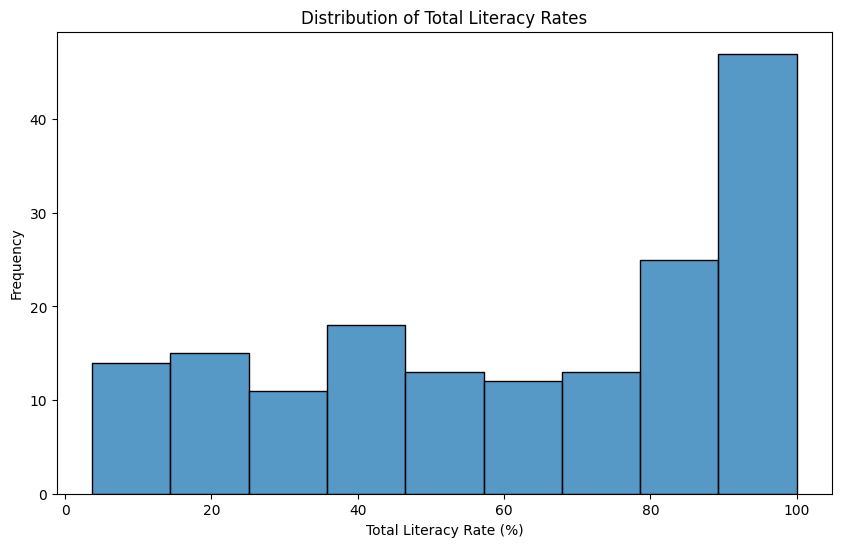

In [79]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Total Literacy Rate'], )
plt.title('Distribution of Total Literacy Rates')
plt.xlabel('Total Literacy Rate (%)')
plt.ylabel('Frequency')
plt.show()

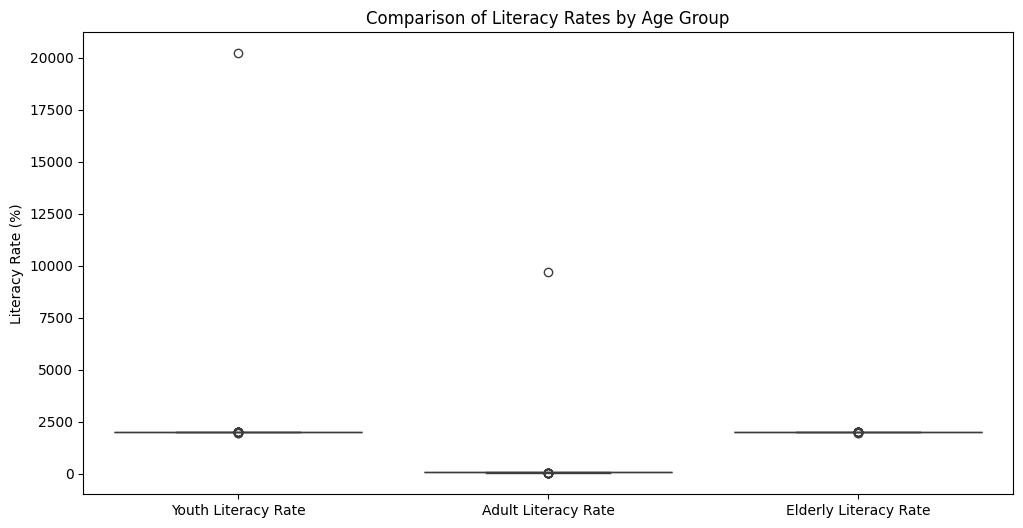

In [78]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['Youth Literacy Rate', 'Adult Literacy Rate', 'Elderly Literacy Rate']])
plt.title('Comparison of Literacy Rates by Age Group')
plt.ylabel('Literacy Rate (%)')
plt.show()


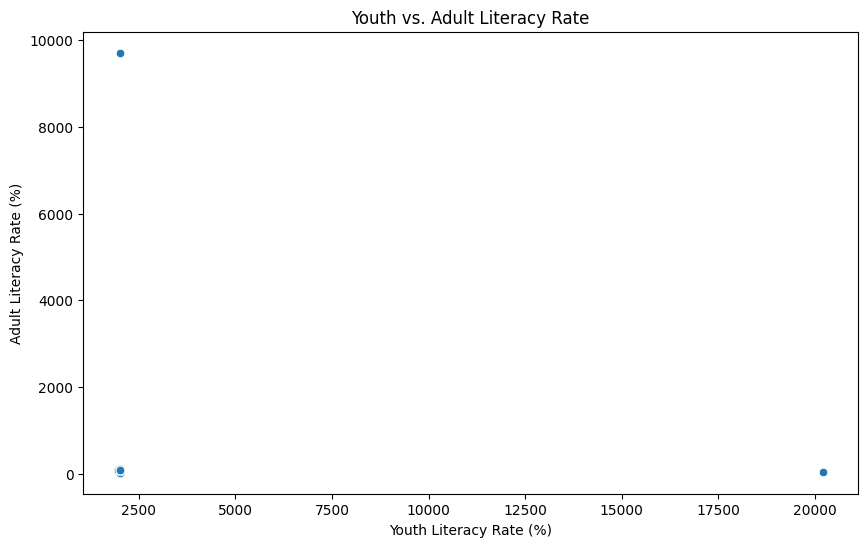

In [82]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Youth Literacy Rate', y='Adult Literacy Rate', data=df)
plt.title('Youth vs. Adult Literacy Rate')
plt.xlabel('Youth Literacy Rate (%)')
plt.ylabel('Adult Literacy Rate (%)')
plt.show()

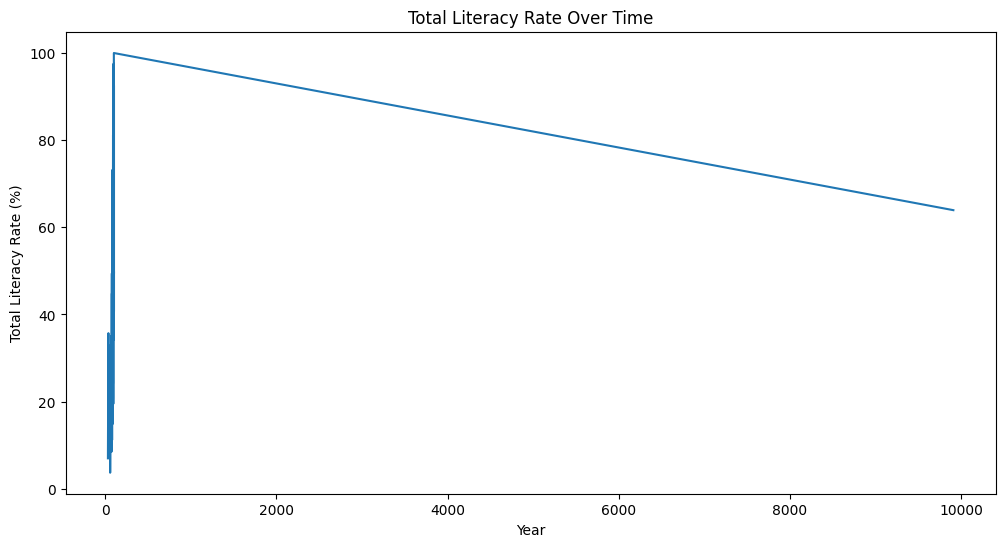

In [81]:
if 'Year' in df.columns:
    plt.figure(figsize=(12, 6))
    sns.lineplot(x='Year', y='Total Literacy Rate', data=df)
    plt.title('Total Literacy Rate Over Time')
    plt.xlabel('Year')
    plt.ylabel('Total Literacy Rate (%)')
    plt.show()

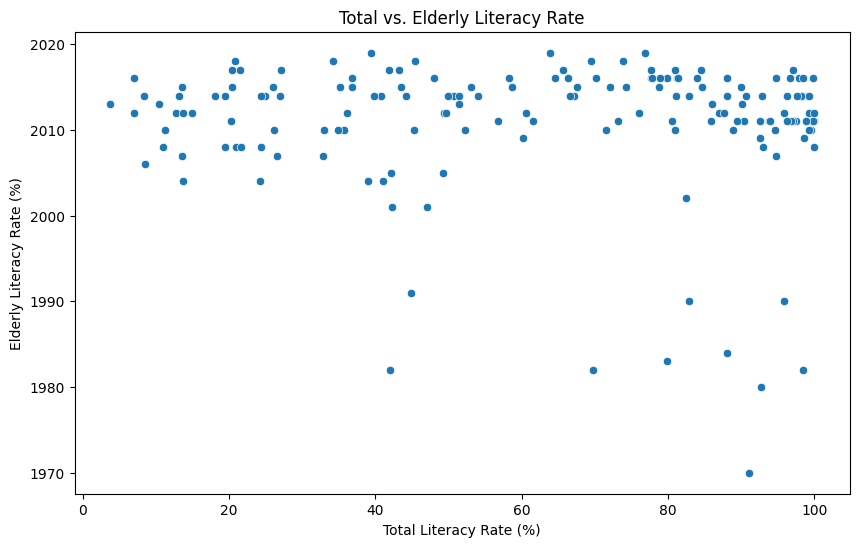

In [83]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Total Literacy Rate', y='Elderly Literacy Rate', data=df)
plt.title('Total vs. Elderly Literacy Rate')
plt.xlabel('Total Literacy Rate (%)')
plt.ylabel('Elderly Literacy Rate (%)')
plt.show()

In [84]:
country_to_region = {
    'United States': 'North America',
    'Canada': 'North America',
    'Mexico': 'North America',
}
df['Region'] = df['Country'].map(country_to_region).fillna('Unknown')
grouped_data = df.groupby(['Region', 'Year'])[['Youth Literacy Rate', 'Adult Literacy Rate', 'Elderly Literacy Rate']].mean()
print("\nRegional Averages for Each Age Group:")
print(grouped_data)


Regional Averages for Each Age Group:
                 Youth Literacy Rate  Adult Literacy Rate  \
Region  Year                                                
Unknown 30.80            2016.000000                22.30   
        36.40            2010.000000                36.80   
        36.70            2008.000000                26.80   
        39.80            2012.000000                30.60   
        46.30            2014.000000                32.00   
...                              ...                  ...   
        99.80            2011.909091                98.60   
        99.85            2018.000000                96.86   
        99.90            2010.500000                99.37   
        100.00           2012.000000               100.00   
        9911.00          2020.000000              9711.00   

                 Elderly Literacy Rate  
Region  Year                            
Unknown 30.80              2016.000000  
        36.40              2010.000000  
   

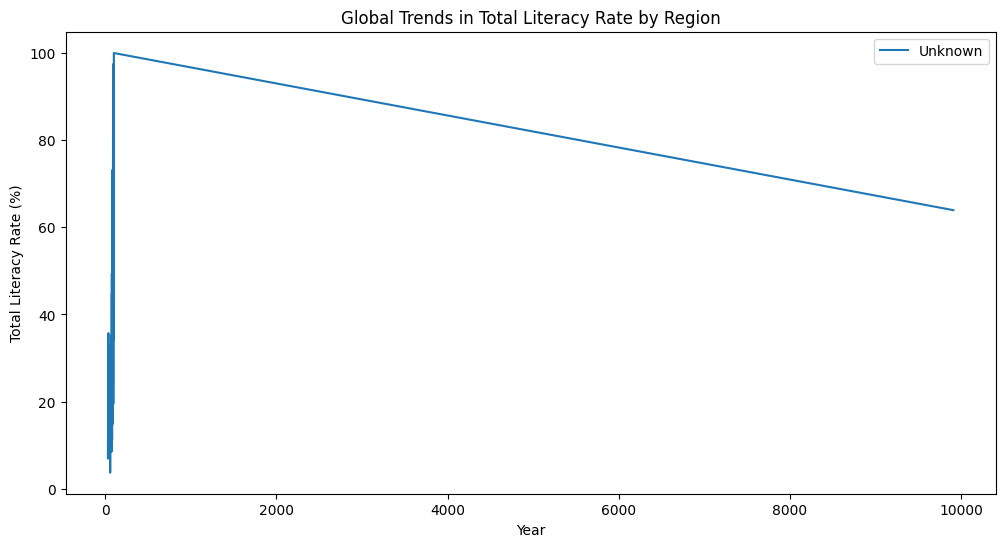

In [85]:
plt.figure(figsize=(12, 6))
for region in df['Region'].unique():
    region_data = df[df['Region'] == region]
    sns.lineplot(x='Year', y='Total Literacy Rate', data=region_data, label=region)

plt.title('Global Trends in Total Literacy Rate by Region')
plt.xlabel('Year')
plt.ylabel('Total Literacy Rate (%)')
plt.legend()
plt.show()

In [86]:

descriptive_stats = df[['Youth Literacy Rate', 'Adult Literacy Rate', 'Elderly Literacy Rate']].describe()
print("\nDescriptive Statistics for Literacy Rates:")
print(descriptive_stats)



Descriptive Statistics for Literacy Rates:
       Youth Literacy Rate  Adult Literacy Rate  Elderly Literacy Rate
count           168.000000           168.000000             168.000000
mean           2119.029762           140.176488            2010.892857
std            1403.662900           743.098948               7.935395
min            1970.000000            22.300000            1970.000000
25%            2010.000000            75.000000            2010.000000
50%            2012.000000            92.700000            2013.000000
75%            2015.000000            97.825000            2015.000000
max           20204.000000          9711.000000            2019.000000


In [87]:
df['Literacy Gap'] = abs(df['Youth Literacy Rate'] - df['Elderly Literacy Rate'])
literacy_gap_threshold = 15
countries_with_gaps = df[df['Literacy Gap'] > literacy_gap_threshold][['Country', 'Youth Literacy Rate', 'Elderly Literacy Rate', 'Literacy Gap']]
print("\nCountries with Significant Literacy Gaps (Youth vs. Elderly):")
countries_with_gaps



Countries with Significant Literacy Gaps (Youth vs. Elderly):


,Country,Youth Literacy Rate,Elderly Literacy Rate,Literacy Gap
0,Afghanistan *,20204.0,2011.0,18193.0


In [96]:

highest_literacy = df.loc[df['Total Literacy Rate'].idxmax()]
lowest_literacy = df.loc[df['Total Literacy Rate'].idxmin()]

print(f"Highest Total Literacy Rate: {highest_literacy['Country']} ({highest_literacy['Total Literacy Rate']:.2f}%)")
print(f"Lowest Total Literacy Rate: {lowest_literacy['Country']} ({lowest_literacy['Total Literacy Rate']:.2f}%)")



Highest Total Literacy Rate: North Korea * (100.00%)
Lowest Total Literacy Rate: Sierra Leone * (3.70%)


In [94]:
df['Literacy Gap'] = abs(df['Youth Literacy Rate'] - df['Elderly Literacy Rate'])
largest_gap = df.loc[df['Literacy Gap'].idxmax()]
print(f"\nLargest Literacy Gap: {largest_gap['Country']} ({largest_gap['Literacy Gap']:.2f}%)")


Largest Literacy Gap: Afghanistan * (18193.00%)


In [93]:
global_avg_youth_literacy = df['Youth Literacy Rate'].mean()
print(f"\nGlobal Average Youth Literacy Rate: {global_avg_youth_literacy:.2f}%")


Global Average Youth Literacy Rate: 2119.03%


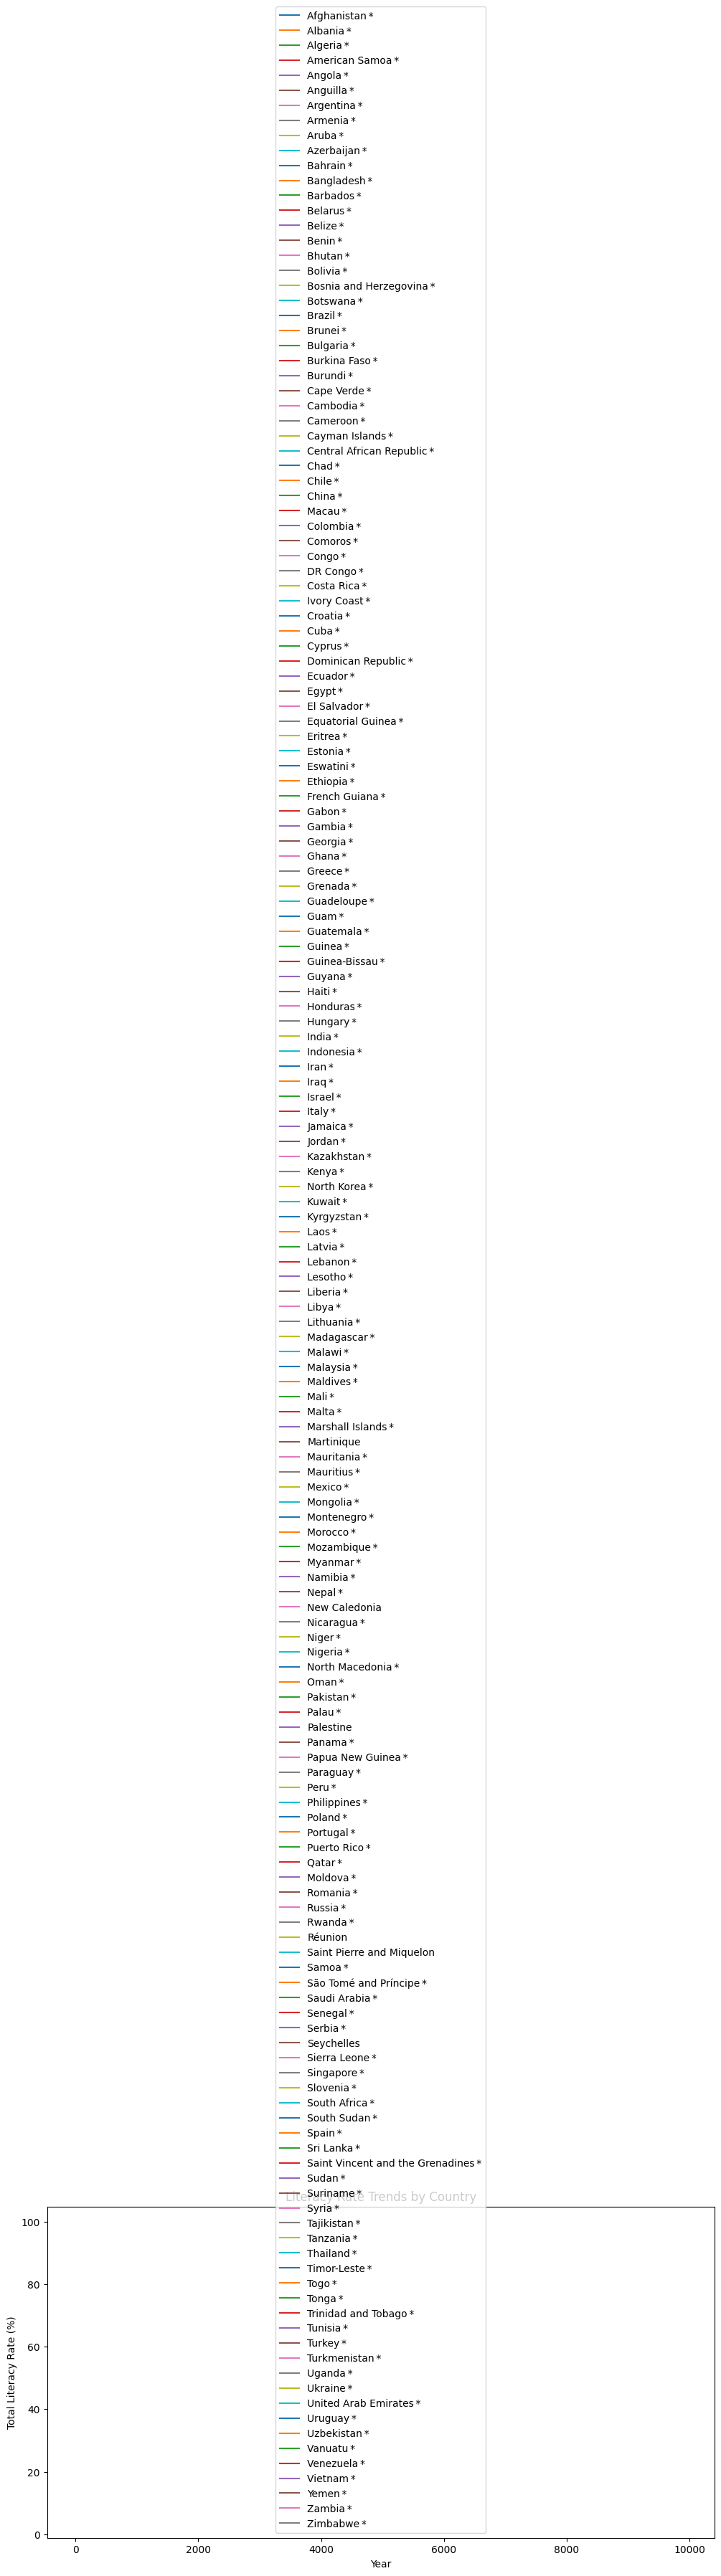

In [92]:
if 'Year' in df.columns:
    plt.figure(figsize=(12, 6))
    for country in df['Country'].unique():
      country_data = df[df['Country'] == country]
      sns.lineplot(x='Year', y='Total Literacy Rate', data=country_data, label=country)
    plt.title('Literacy Rate Trends by Country')
    plt.xlabel('Year')
    plt.ylabel('Total Literacy Rate (%)')
    plt.legend()
    plt.show()
else:
    print("Year column not found in the dataframe.")
    print("Cannot perform analysis of literacy improvement over time without year information.")


In [91]:
high_youth_low_elderly = df[(df['Youth Literacy Rate'] >= 90) & (df['Elderly Literacy Rate'] <= 50)]
print("\nCountries with High Youth but Low Elderly Literacy:")
print(high_youth_low_elderly[['Country', 'Youth Literacy Rate', 'Elderly Literacy Rate']])


Countries with High Youth but Low Elderly Literacy:
Empty DataFrame
Columns: [Country, Youth Literacy Rate, Elderly Literacy Rate]
Index: []


In [89]:
uniformly_high = df[(df['Total Literacy Rate'] > 95) & (df['Youth Literacy Rate'] > 95) & (df['Adult Literacy Rate'] > 95) & (df['Elderly Literacy Rate'] > 95)]
print("\nCountries with Uniformly High Literacy:")
print(uniformly_high[['Country','Total Literacy Rate', 'Youth Literacy Rate', 'Adult Literacy Rate', 'Elderly Literacy Rate']])


Countries with Uniformly High Literacy:
                       Country  Total Literacy Rate  Youth Literacy Rate  \
6                  Argentina *                 97.9               2016.0   
7                    Armenia *                 98.9               2011.0   
9                 Azerbaijan *                 98.4               2016.0   
12                  Barbados *                 98.5               2014.0   
13                   Belarus *                 98.6               2009.0   
22                  Bulgaria *                 97.5               2011.0   
40                   Croatia *                 97.1               2011.0   
41                      Cuba *                 99.2               2012.0   
49                   Estonia *                 99.7               2011.0   
55                   Georgia *                 99.1               2014.0   
58                   Grenada *                 96.2               2014.0   
60                      Guam *                 

In [90]:
std_devs = df[['Youth Literacy Rate', 'Adult Literacy Rate', 'Elderly Literacy Rate']].std()
age_group_most_variation = std_devs.idxmax()
print(f"\nAge Group with the Most Variation in Literacy: {age_group_most_variation}")


Age Group with the Most Variation in Literacy: Youth Literacy Rate


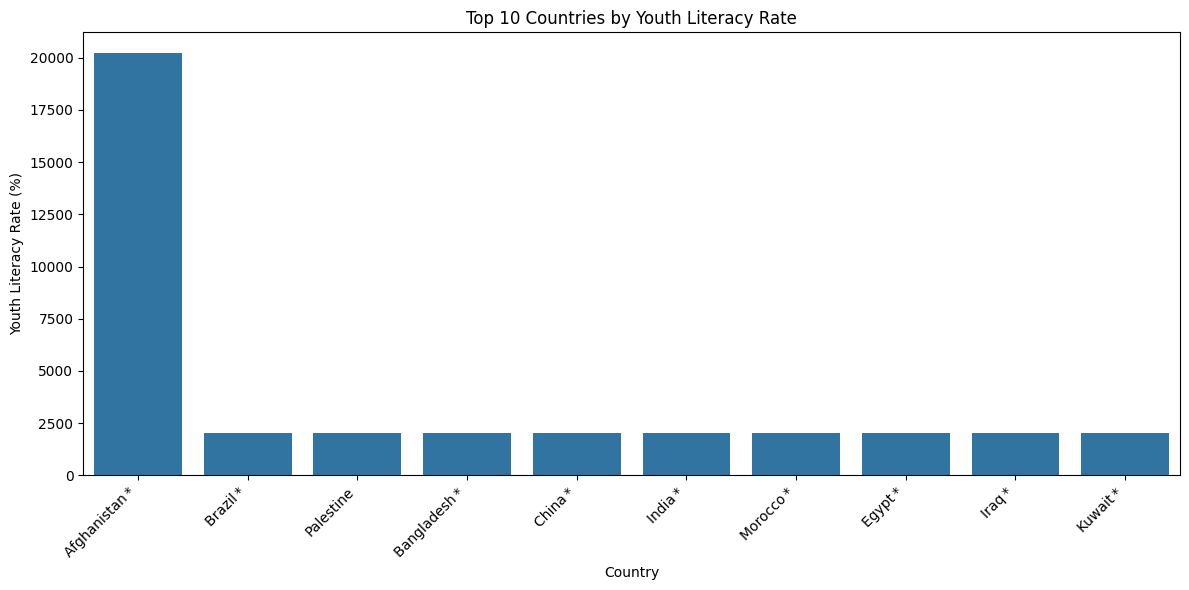

In [98]:

plt.figure(figsize=(12, 6))
top_10_youth_literacy = df.nlargest(10, 'Youth Literacy Rate')
sns.barplot(x='Country', y='Youth Literacy Rate', data=top_10_youth_literacy)
plt.title('Top 10 Countries by Youth Literacy Rate')
plt.xlabel('Country')
plt.ylabel('Youth Literacy Rate (%)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



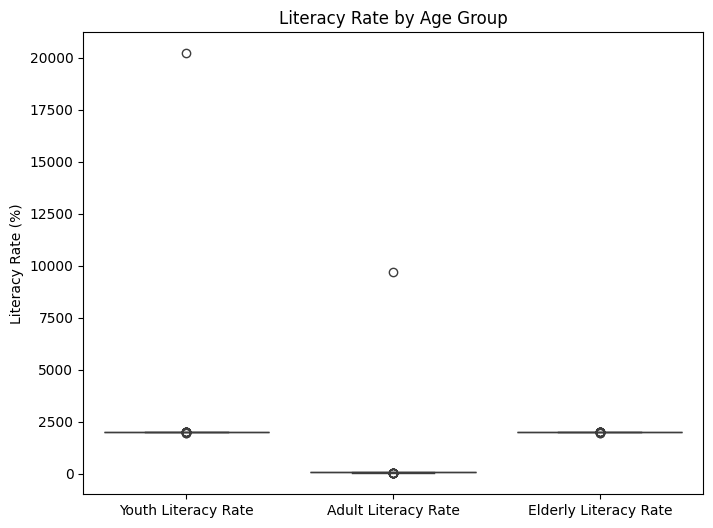

In [99]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df[['Youth Literacy Rate', 'Adult Literacy Rate', 'Elderly Literacy Rate']])
plt.title('Literacy Rate by Age Group')
plt.ylabel('Literacy Rate (%)')
plt.show()

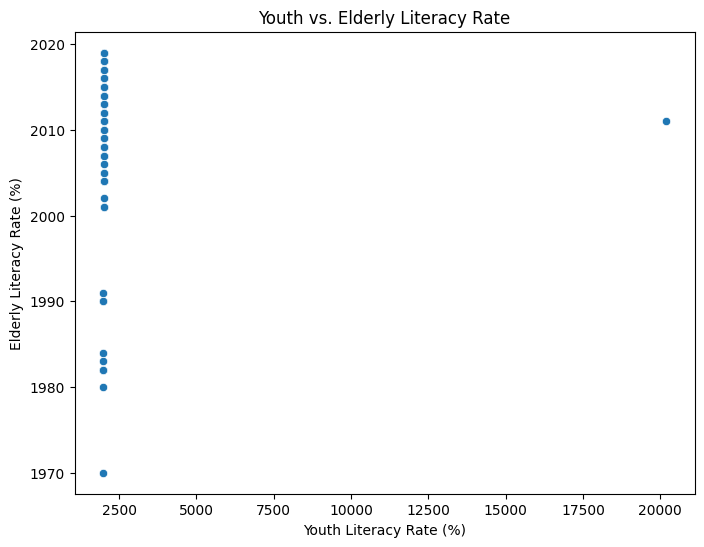

In [100]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Youth Literacy Rate', y='Elderly Literacy Rate', data=df)
plt.title('Youth vs. Elderly Literacy Rate')
plt.xlabel('Youth Literacy Rate (%)')
plt.ylabel('Elderly Literacy Rate (%)')
plt.show()

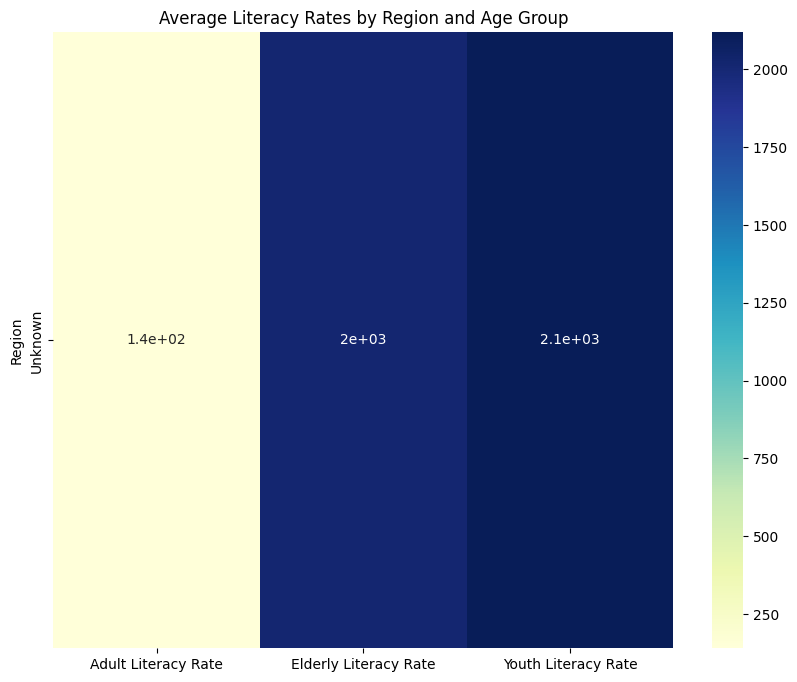

In [101]:
if 'Region' in df.columns:
    plt.figure(figsize=(10, 8))
    region_literacy = df.pivot_table(values=['Youth Literacy Rate', 'Adult Literacy Rate', 'Elderly Literacy Rate'], index='Region', aggfunc='mean')
    sns.heatmap(region_literacy, annot=True, cmap='YlGnBu')
    plt.title('Average Literacy Rates by Region and Age Group')
    plt.show()
else:
    print("Region column not found in the DataFrame. Cannot create heatmap.")

In [103]:
from google.colab import drive
drive.mount('/content/drive')

df.to_csv('/content/drive/My Drive/literacy_rates_final.csv', index=False)

plt.savefig('/content/drive/My Drive/literacy_heatmap.png')

Mounted at /content/drive


<Figure size 640x480 with 0 Axes>

In [104]:
from google.colab import files
files.download('literacy_rates.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>